In [2]:
from sklearn.datasets import load_digits
digits = load_digits()


In [3]:
type(digits.data)

numpy.ndarray

In [4]:
type(digits.target)

numpy.ndarray

In [5]:
print('Image data shape',digits.data.shape)

Image data shape (1797, 64)


In [6]:
print('Label data shape',digits.target.shape)

Label data shape (1797,)


In [7]:
import matplotlib.pyplot as plt 
import numpy as np

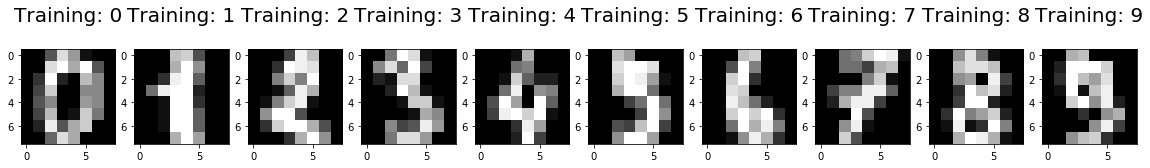

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
def costFunctionReg(theta, X, y,lmbda):
    m = len(y)
    e=10**(-6) 
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta)+e)))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))+e))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [11]:
def gradRegularization(theta, X, y,lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [12]:
X = digits.data
Y = digits.target


In [13]:
m = len(Y)
ones = np.ones((m,1))
X = np.hstack((ones, X))

In [14]:
(m,n) = X.shape

In [15]:
m,n

(1797, 65)

In [16]:
type(digits.data)

numpy.ndarray

In [17]:
import scipy

In [27]:
lmbda = 0.1
k = 10
theta = np.zeros((k,n)) #inital parameters
for i in range(k):
    digit_class = i if i else 10
    theta[i] = scipy.optimize.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization, args = (X, (Y == digit_class).flatten(), lmbda), maxiter = 50)

         Current function value: 0.693145
         Iterations: 0
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: 0.033221
         Iterations: 100
         Function evaluations: 201
         Gradient evaluations: 201
Optimization terminated successfully.
         Current function value: 0.000276
         Iterations: 66
         Function evaluations: 166
         Gradient evaluations: 166
         Current function value: 0.011948
         Iterations: 100
         Function evaluations: 206
         Gradient evaluations: 206
         Current function value: 0.000364
         Iterations: 100
         Function evaluations: 258
         Gradient evaluations: 258
         Current function value: 0.000954
         Iterations: 100
         Function evaluations: 200
         Gradient evaluations: 200
         Current function value: 0.000639
         Iterations: 100
         Function evaluations: 227
         Gradient evaluations: 227
        

In [24]:
theta.shape

(10, 65)

In [25]:
theta


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [28]:
pred = np.argmax(X @ theta.T, axis = 1)

np.mean(pred == Y.flatten()) * 100

96.71675013912076